# Regresión Lineal

### Skills For Industry

In [ ]:
###test

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
location_data = pd.read_csv('/content/drive/MyDrive/data/location_rev.csv')

In [5]:
location_data.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [6]:
location_data.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [ ]:
location_data.tail()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
995,46689.11,3.0,28278.48,961.0,3335.0,16.0
996,34826.87,4.0,27801.73,1914.0,2507.0,14.0
997,28618.06,3.0,35481.50,1294.0,1731.0,10.0
998,40226.41,4.0,29218.30,1932.0,4410.0,13.0
999,39093.23,4.0,34785.80,2803.0,4270.0,8.0


In [8]:
location_data.isnull().sum()

revenue                0
num_competitors        0
median_income          0
num_loyalty_members    0
population_density     0
location_age           0
dtype: int64

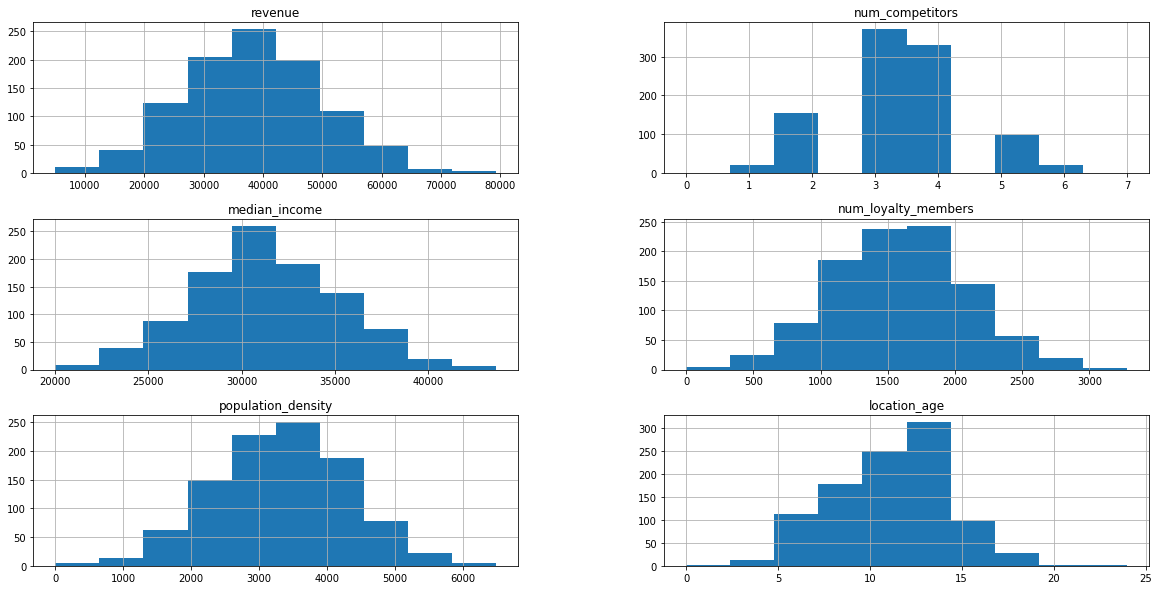

In [12]:
location_data.hist(figsize = (20, 10));

In [17]:
from scipy.stats import kstest, normaltest

KstestResult(statistic=0.013501098580180781, pvalue=0.9921770275854719)

In [28]:
kstest(location_data['population_density'], 'norm', args =(location_data['population_density'].mean(), location_data['population_density'].std()))

KstestResult(statistic=0.013501098580180781, pvalue=0.9921770275854719)

In [ ]:
kstest((location_data['population_density'] -  location_data['population_density'].mean()) / location_data['population_density'].std(), 'norm', N=1000)

In [18]:
normaltest(location_data['population_density']) #D’Agostino and Pearson’s

NormaltestResult(statistic=0.21650440503166507, pvalue=0.897401241037234)

In [ ]:
location_data.shape

(1000, 6)

In [ ]:
location_data.keys()

Index(['revenue', 'num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [ ]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [7]:
location_data.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


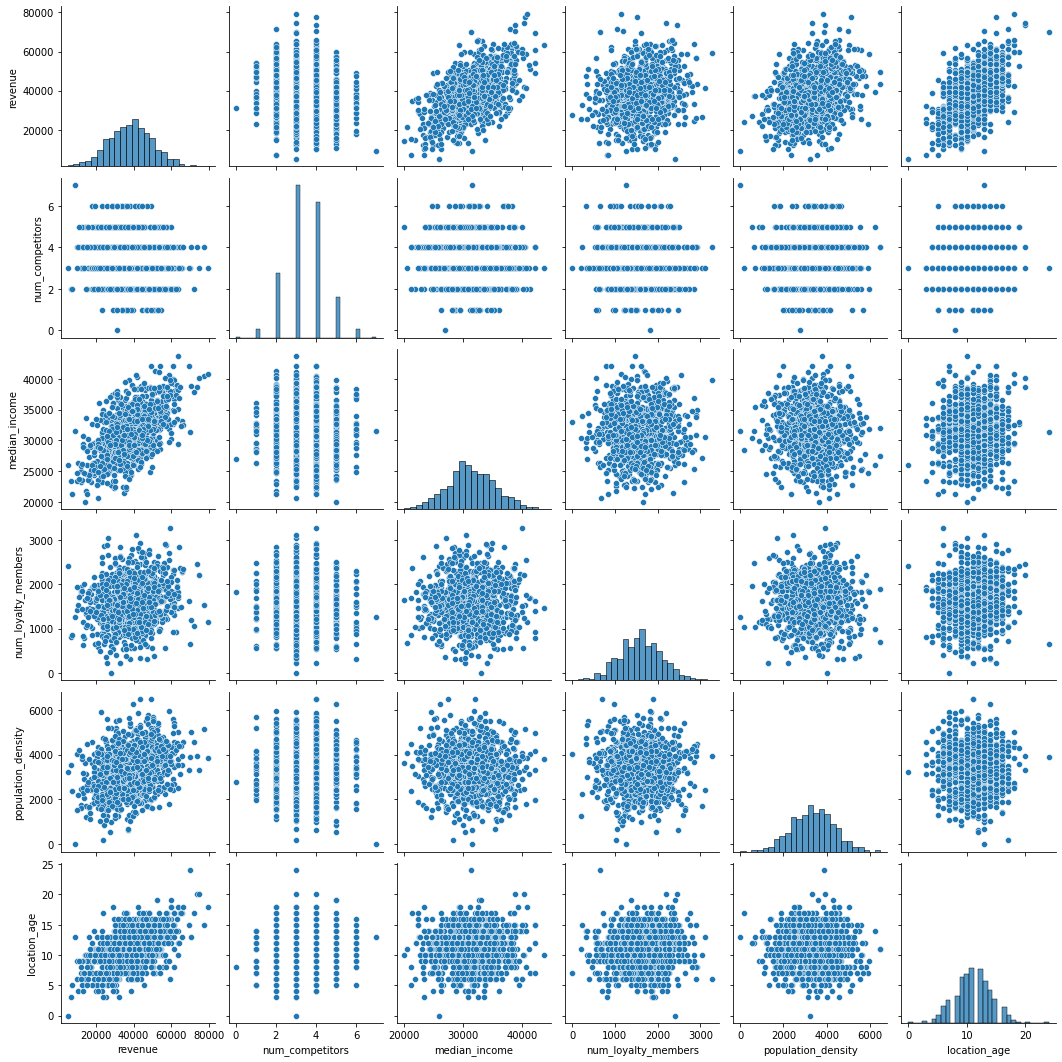

In [21]:
import seaborn as sns
sns.pairplot(location_data)

In [ ]:
X = location_data[['num_competitors','median_income','num_loyalty_members','population_density','location_age']]
y = location_data['revenue']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [ ]:
model.intercept_

-51068.63644236374

In [ ]:
single_location = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_location)

array([27573.21782447])

In [ ]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

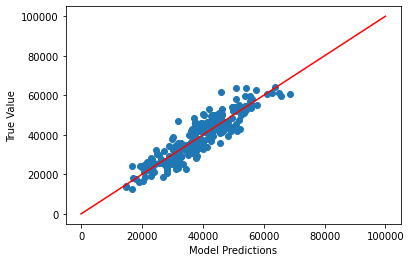

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.9061597827907564, 1.1552714895195607e-94)